In this project I'm going to classify 2 classes of wine using some Machine Learning algorithms like Knn, Neural Networks, Logistic, and so on. At the end of each algorithm, we can see the results on the test set.

## Import libraries and load dataset

In [1]:
import numpy as np, pandas as pd, matplotlib.pyplot as plt
import sklearn
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.preprocessing import StandardScaler
import seaborn as sns
from sklearn.preprocessing import LabelEncoder
from sklearn.metrics import classification_report
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.ensemble import RandomForestClassifier
import torch
from torch import nn

In [2]:
dataset = pd.read_csv('/content/drive/MyDrive/Colab Notebooks/Datasets/WineQuality.csv')

In [3]:
dataset

,Unnamed: 0,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality,Type
0,2732,7.4,0.170,0.29,1.4,0.047,23.0,107.0,0.99390,3.52,0.65,10.4,6,White Wine
1,2607,5.3,0.310,0.38,10.5,0.031,53.0,140.0,0.99321,3.34,0.46,11.7,6,White Wine
2,1653,4.7,0.145,0.29,1.0,0.042,35.0,90.0,0.99080,3.76,0.49,11.3,6,White Wine
3,3264,6.9,0.260,0.29,4.2,0.043,33.0,114.0,0.99020,3.16,0.31,12.5,6,White Wine
4,4931,6.4,0.450,0.07,1.1,0.030,10.0,131.0,0.99050,2.97,0.28,10.8,5,White Wine
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
32480,2838,5.0,0.255,0.22,2.7,0.043,46.0,153.0,0.99238,3.75,0.76,11.3,6,White Wine
32481,6414,6.6,0.360,0.52,11.3,0.046,8.0,110.0,0.99660,3.07,0.46,9.4,5,White Wine
32482,1126,6.3,0.200,0.24,1.7,0.052,36.0,135.0,0.99374,3.80,0.66,10.8,6,White Wine
32483,2924,6.2,0.200,0.33,5.4,0.028,21.0,75.0,0.99012,3.36,0.41,13.5,7,White Wine


As you can see, we have some features with integer and float values and also have a feature with string values that show the type of the wines, so we can separate this dataset into 2 parts; input features and output features. Let's do this

## Data Preprocesss

First, let's get some information about the dataset columns

In [4]:
dataset.dropna()
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 32485 entries, 0 to 32484
Data columns (total 14 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   Unnamed: 0            32485 non-null  int64  
 1   fixed acidity         32485 non-null  float64
 2   volatile acidity      32485 non-null  float64
 3   citric acid           32485 non-null  float64
 4   residual sugar        32485 non-null  float64
 5   chlorides             32485 non-null  float64
 6   free sulfur dioxide   32485 non-null  float64
 7   total sulfur dioxide  32485 non-null  float64
 8   density               32485 non-null  float64
 9   pH                    32485 non-null  float64
 10  sulphates             32485 non-null  float64
 11  alcohol               32485 non-null  float64
 12  quality               32485 non-null  int64  
 13  Type                  32485 non-null  object 
dtypes: float64(11), int64(2), object(1)
memory usage: 3.5+ MB


In [5]:
dataset.Type.unique()
# Our problem has 2 class so we can use binary classification algorithm

array(['White Wine', 'Red Wine'], dtype=object)

We have two types of wine, so our task is binary classification

In [6]:
dataset.drop(['Unnamed: 0'], inplace=True, axis=1)

In the below section we encode the output(we will see later that this column is y_train), so we can use it to teach models.

In [7]:
encoder = LabelEncoder()
dataset.Type = encoder.fit_transform(dataset.Type)

In [8]:
dataset

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality,Type
0,7.4,0.170,0.29,1.4,0.047,23.0,107.0,0.99390,3.52,0.65,10.4,6,1
1,5.3,0.310,0.38,10.5,0.031,53.0,140.0,0.99321,3.34,0.46,11.7,6,1
2,4.7,0.145,0.29,1.0,0.042,35.0,90.0,0.99080,3.76,0.49,11.3,6,1
3,6.9,0.260,0.29,4.2,0.043,33.0,114.0,0.99020,3.16,0.31,12.5,6,1
4,6.4,0.450,0.07,1.1,0.030,10.0,131.0,0.99050,2.97,0.28,10.8,5,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...
32480,5.0,0.255,0.22,2.7,0.043,46.0,153.0,0.99238,3.75,0.76,11.3,6,1
32481,6.6,0.360,0.52,11.3,0.046,8.0,110.0,0.99660,3.07,0.46,9.4,5,1
32482,6.3,0.200,0.24,1.7,0.052,36.0,135.0,0.99374,3.80,0.66,10.8,6,1
32483,6.2,0.200,0.33,5.4,0.028,21.0,75.0,0.99012,3.36,0.41,13.5,7,1


Let's see the relationships between features, this heat map shows the relationships between different features and the effect of each feature on other features. This is one of the easiest ways to gain intuition about the relationships between our features.

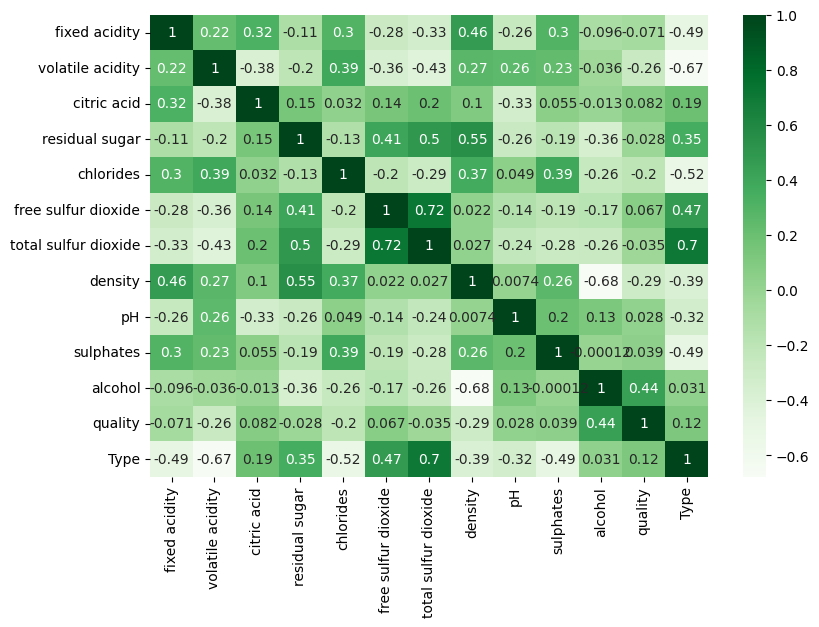

In [12]:
plt.figure(figsize = (9, 6))
sns.heatmap(dataset.corr(), cmap='Greens', annot=True)
plt.show()

Now, we should separate our data into two parts, input(X) and output(Y). The input features are used for training the models and based on these features the model should say if the input sample is red wine or white, and then compare its result with output(Y).

In [13]:
X = dataset.drop(['Type'], axis = 1)
Y = dataset.Type

We use Standardscaler to normalize the input features, this can help models learn faster and more efficiently.

In [14]:
scaler = StandardScaler()
X = scaler.fit_transform(X)

## Machine Learning Algoritm

This section is about training some algorithms and getting the result of each. Let's look at the results and compare them.

### Logistic Regression

In [15]:
x_train, x_test, y_train, y_test = train_test_split(X, Y, test_size=0.15, random_state=0)
print(f'x_train shape: {x_train.shape} and y_train shape: {y_train.shape}')

x_train shape: (27612, 12) and y_train shape: (27612,)


In [16]:
logistic = LogisticRegression(max_iter=100)
logistic.fit(x_train, y_train)
y_pred_logistic = logistic.predict(x_test)
print(classification_report(y_test, y_pred_logistic))

              precision    recall  f1-score   support

           0       0.99      0.99      0.99      1261
           1       1.00      1.00      1.00      3612

    accuracy                           0.99      4873
   macro avg       0.99      0.99      0.99      4873
weighted avg       0.99      0.99      0.99      4873



### KNN

In [17]:

knn = KNeighborsClassifier(n_neighbors=5)
knn.fit(x_train, y_train)
y_pred_knn = knn.predict(x_test)
print(classification_report(y_test, y_pred_knn))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00      1261
           1       1.00      1.00      1.00      3612

    accuracy                           1.00      4873
   macro avg       1.00      1.00      1.00      4873
weighted avg       1.00      1.00      1.00      4873



### Naive Bayes

In [18]:

NB = GaussianNB()
NB.fit(x_train, y_train)
y_predict_nb = NB.predict(x_test)
print(classification_report(y_test, y_predict_nb))

              precision    recall  f1-score   support

           0       0.93      0.97      0.95      1261
           1       0.99      0.98      0.98      3612

    accuracy                           0.97      4873
   macro avg       0.96      0.97      0.97      4873
weighted avg       0.97      0.97      0.97      4873



### Random Forest

For Random Forest you can change n_estimators and max_features to get the higher result.

In [19]:

forest = RandomForestClassifier(n_estimators=200, max_depth=7)
forest.fit(x_train, y_train)
y_pred_forest = forest.predict(x_test)
print(classification_report(y_test, y_pred_forest))

              precision    recall  f1-score   support

           0       1.00      0.99      0.99      1261
           1       1.00      1.00      1.00      3612

    accuracy                           1.00      4873
   macro avg       1.00      0.99      1.00      4873
weighted avg       1.00      1.00      1.00      4873



### Neural Network

As the last algorithm, we implement deep learning to train a model. We use the Pytorch framework. The model has 2 hidden layers and 1 output layer.

In [20]:
dataset

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality,Type
0,7.4,0.170,0.29,1.4,0.047,23.0,107.0,0.99390,3.52,0.65,10.4,6,1
1,5.3,0.310,0.38,10.5,0.031,53.0,140.0,0.99321,3.34,0.46,11.7,6,1
2,4.7,0.145,0.29,1.0,0.042,35.0,90.0,0.99080,3.76,0.49,11.3,6,1
3,6.9,0.260,0.29,4.2,0.043,33.0,114.0,0.99020,3.16,0.31,12.5,6,1
4,6.4,0.450,0.07,1.1,0.030,10.0,131.0,0.99050,2.97,0.28,10.8,5,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...
32480,5.0,0.255,0.22,2.7,0.043,46.0,153.0,0.99238,3.75,0.76,11.3,6,1
32481,6.6,0.360,0.52,11.3,0.046,8.0,110.0,0.99660,3.07,0.46,9.4,5,1
32482,6.3,0.200,0.24,1.7,0.052,36.0,135.0,0.99374,3.80,0.66,10.8,6,1
32483,6.2,0.200,0.33,5.4,0.028,21.0,75.0,0.99012,3.36,0.41,13.5,7,1


In [21]:
X = dataset.drop(['Type'], axis = 1)
Y = dataset.Type

In [22]:
scaler = StandardScaler()
X = scaler.fit_transform(X)

In [23]:
X = torch.tensor(X).float()
Y = torch.tensor(Y).float()

In [24]:
x_train, x_test, y_train, y_test = train_test_split(X, Y, test_size=0.15, random_state=0)
x_train, x_dev, y_train, y_dev = train_test_split(x_train, y_train, test_size=0.1, random_state=0)

In [25]:
print(f"shape x_train: {x_train.shape}, shape x_test: {x_test.shape}, shape x_dev: {x_dev.shape}")

shape x_train: torch.Size([24850, 12]), shape x_test: torch.Size([4873, 12]), shape x_dev: torch.Size([2762, 12])


In [26]:
class NeuralNetwork(nn.Module):
    def __init__(self):
        super(NeuralNetwork, self).__init__()
        self.sequence = nn.Sequential(
            # Layer 1 => ReLU(12, 64)
            nn.Linear(12, 64),
            nn.ReLU(),
            # Layer 2 => ReLU(64, 64)
            nn.Linear(64, 64),
            nn.ReLU(),
            # Layer 3 => Sigmoid(64,1)
            nn.Linear(64,1),
            nn.Sigmoid()
        )

    def forward(self, x):
        x = self.sequence(x)
        return x

In [27]:
def train(data, model, loss_func, optimizer):
    for batch, (X,y) in enumerate(data):
        # Clean the old gradient computation
        optimizer.zero_grad()

        # Train the model
        y_pred = model(X)

        # Get loss
        ls = loss_func(y_pred, y)

        # Backward propagation
        ls.backward()
        optimizer.step()

In [28]:
def validation(x_dev, y_dev, model, loss_func):
    with torch.no_grad():
        y_pred_dev = model(x_dev)
        ls_val = loss_func(y_pred_dev, y_dev)

        return ls_val

#### Set hyperparameters

In [29]:
learning_rate = 0.01
model = NeuralNetwork()
loss = nn.functional.binary_cross_entropy
optimizer = torch.optim.Adam(model.parameters(), lr= learning_rate)
epoch = 30
batch_size = 16
decay_rate = 1

#### Train the model and get result

In [30]:
x_train = torch.tensor(x_train).float()
x_test = torch.tensor(x_test).float()
x_dev = torch.tensor(x_dev).float()

<ipython-input-30-b5fcc25d8cfd>:1: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).
  x_train = torch.tensor(x_train).float()
<ipython-input-30-b5fcc25d8cfd>:2: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).
  x_test = torch.tensor(x_test).float()
<ipython-input-30-b5fcc25d8cfd>:3: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).
  x_dev = torch.tensor(x_dev).float()


In [31]:
y_train = y_train.reshape(-1,1)
y_dev = y_dev.reshape(-1,1)
y_test = y_test.reshape(-1,1)

In [32]:
from torch.utils.data import TensorDataset, DataLoader
merged_data = TensorDataset(x_train, y_train)
train_dataset = DataLoader(merged_data, batch_size= batch_size)

We use learning rate decay to decrease the learning rate for each epoch.

In [33]:
learning_rate_init = learning_rate
for e in range(epoch):
    optimizer = torch.optim.Adam(model.parameters(), lr= learning_rate)
    learning_rate = learning_rate_init/(1+(decay_rate*(e+1)))
    train(train_dataset, model, loss, optimizer)
    returned_loss =  validation(x_dev, y_dev, model, loss)
    if (e+1) % 5 == 0:
        print(f"Epoch({e+1}) => loss: {'%.5f' % returned_loss}")

Epoch(5) => loss: 0.00635
Epoch(10) => loss: 0.00263
Epoch(15) => loss: 0.00131
Epoch(20) => loss: 0.00097
Epoch(25) => loss: 0.00085
Epoch(30) => loss: 0.00110


Evaluate model performance on the test set.

In [34]:
y_pred_nn = model(x_test)

#### Manipulate the output and get result from test set

In [35]:
y_pred_nn = y_pred_nn.reshape(1,-1)
y_test = y_test.reshape(1,-1)
# Convert to numpy
y_pred_nn = y_pred_nn.detach().numpy()
y_test = y_test.detach().numpy()
# Make them 2D array
y_pred_nn = y_pred_nn[0]
y_test = y_test[0]
# Make sure that they both have binary values so we can use classification_report class
threshold = 0.5
y_true_binary = [1 if val > threshold else 0 for val in y_test]
y_pred_binary = [1 if val2 > threshold else 0 for val2 in y_pred_nn]
print(classification_report(y_true_binary, y_pred_binary))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00      1261
           1       1.00      1.00      1.00      3612

    accuracy                           1.00      4873
   macro avg       1.00      1.00      1.00      4873
weighted avg       1.00      1.00      1.00      4873

